# MVP for Kickstarter Data

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
cia_table_df = pd.read_pickle('cia_table_df.pkl')
cia_table_df.head()

,rank,country_name,gdp_ppp_pc,est_date,url_link_wiki,country_code
0,1,Liechtenstein,139100,2009 est.,/wiki/Liechtenstein,LI
1,2,Qatar,124900,2017 est.,/wiki/Qatar,QA
2,3,Monaco,115700,2015 est.,/wiki/Monaco,MC
3,—,Macau,114400,2017 est.,/wiki/Macau,MO
4,4,Luxembourg,109100,2017 est.,/wiki/Luxembourg,LU


In [4]:
cia_table_df.dtypes

rank             object
country_name     object
gdp_ppp_pc        int64
est_date         object
url_link_wiki    object
country_code     object
dtype: object

In [5]:
kickstarter_df = pd.read_csv('kickstarter_data/Kickstarter_2018-09-13T03_20_17_777Z/Kickstarter.csv')


In [6]:
kickstarter_df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,80,If you've ever been disheartened by how some p...,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",3651,US,1364866426,"{""id"":101710808,""name"":""Neal Samudre"",""is_regi...",USD,$,True,...,how-weve-changed-jesus-neal-samudres-debut-book,https://www.kickstarter.com/discover/categorie...,True,False,successful,1365789635,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3651.000000,international
1,31,This book will show you how to attract your id...,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",326,GB,1482012501,"{""id"":270084862,""name"":""Scott C. Campbell"",""is...",GBP,£,False,...,your-client-vision-book-how-to-sell-without-se...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1484606700,1.247352,"{""web"":{""project"":""https://www.kickstarter.com...",338.032525,international
2,357,Our goal is to re-publish 500 old Christian bo...,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",22152,US,1370072751,"{""id"":280985097,""name"":""Luke Wilson"",""slug"":""l...",USD,$,True,...,500-old-christian-books-republished,https://www.kickstarter.com/discover/categorie...,True,False,successful,1374462035,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22152.000000,international
3,74,I told my first lie when I was six and never s...,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2689,CA,1475730164,"{""id"":1190486459,""name"":""Shamhan Bhuiyan"",""is_...",CAD,$,True,...,the-longest-lie-i-ever-told,https://www.kickstarter.com/discover/categorie...,True,False,successful,1478626376,0.752649,"{""web"":{""project"":""https://www.kickstarter.com...",2709.535536,international
4,12,Für die Finanzierung der Veröffentlichung mein...,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",1205,DE,1467987217,"{""id"":679958171,""name"":""Franz Straubinger"",""is...",EUR,€,False,...,spurenlesen-zur-philosophie-der-human-animal-s...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1471177056,1.111358,"{""web"":{""project"":""https://www.kickstarter.com...",1200.266726,international


In [7]:
kickstarter_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [8]:
kickstarter_df.dtypes

backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
id                            int64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                      object
slug                        

In [28]:
kickstarter_df['location'].iloc[0]

'{"id":2418117,"name":"Harrisonburg","slug":"harrisonburg-va","short_name":"Harrisonburg, VA","displayable_name":"Harrisonburg, VA","localized_name":"Harrisonburg","country":"US","state":"VA","type":"Town","is_root":false,"urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/harrisonburg-va","location":"https://www.kickstarter.com/locations/harrisonburg-va"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1536866743.d32d9dbb223f430fc269a633c7f5f56a016fe689&woe_id=2418117"}}}'

In [29]:
kickstarter_df.shape

(4008, 37)

In [30]:
merged_df = pd.merge(kickstarter_df, cia_table_df, how='left', left_on='country', right_on='country_code')

In [31]:
merged_df.shape

(4008, 43)

In [32]:
merged_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'rank',
       'country_name', 'gdp_ppp_pc', 'est_date', 'url_link_wiki',
       'country_code'],
      dtype='object')

In [40]:
merged_df.dtypes[merged_df.dtypes != 'object']

backers_count                 int64
converted_pledged_amount      int64
created_at                    int64
currency_trailing_code         bool
deadline                      int64
disable_communication          bool
fx_rate                     float64
goal                        float64
id                            int64
is_starrable                   bool
launched_at                   int64
pledged                     float64
spotlight                      bool
staff_pick                     bool
state_changed_at              int64
static_usd_rate             float64
usd_pledged                 float64
gdp_ppp_pc                    int64
dtype: object

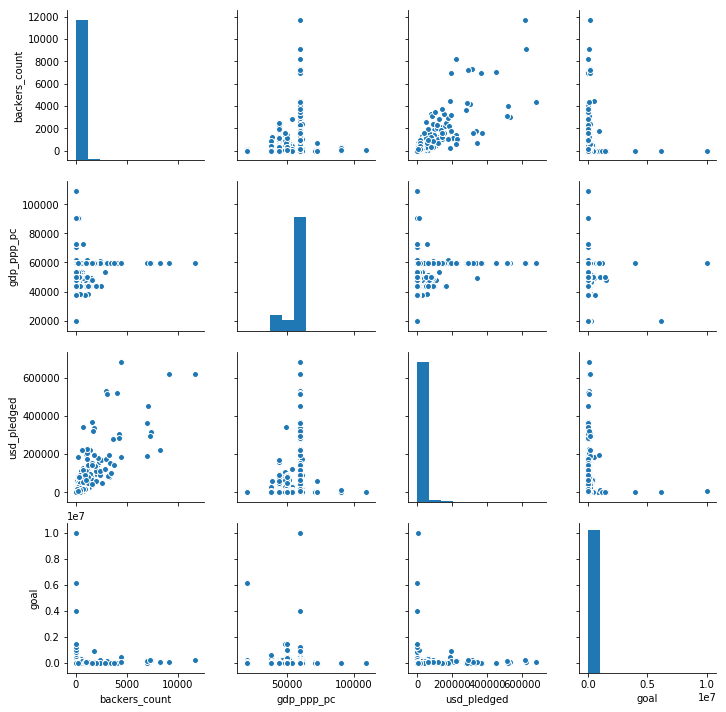

In [39]:
sns.pairplot(merged_df[['backers_count', 'gdp_ppp_pc', 'usd_pledged', 'goal']]);

In [69]:
merged_df['gdp_ppp_pc'].sort_values().unique()

array([ 19500,  38000,  38200,  38500,  43600,  46300,  48100,  49200,
        49600,  49900,  50200,  51300,  53600,  59500,  61000,  61400,
        70600,  72600,  90500, 109100])

In [99]:
columns_delete = merged_df.isna().sum().sort_values(ascending=False)[lambda x: x>0].axes
columns_delete

[Index(['is_starred', 'friends', 'permissions', 'is_backing', 'location'], dtype='object')]

In [100]:
columns_delete[0].tolist()

['is_starred', 'friends', 'permissions', 'is_backing', 'location']

In [101]:
merged_df.drop(columns_delete[0].tolist(), axis=1, inplace=True)

In [103]:
merged_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'name', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'rank',
       'country_name', 'gdp_ppp_pc', 'est_date', 'url_link_wiki',
       'country_code'],
      dtype='object')

In [113]:
from pandas.io.json import json_normalize
import json

In [119]:
json.loads(merged_df['category'].iloc[0])['slug']

'publishing/nonfiction'

The next three cells show that the slug and categories with subcategories name are the same. Since they're the same, I'll be using the name instead of the slug

In [188]:
category_slug = merged_df['category'].apply(lambda x: json.loads(x)['slug']) \
    .apply(lambda x: (x.split('/')[1] if '/' in x else x)) \
    .unique()
category_slug.size

45

In [189]:
category_name = merged_df['category'].apply(lambda x: json.loads(x)['name'].lower()).unique()
category_name.size

45

In [186]:
[x for x in category_slug if x not in category_name]

[]

In [134]:
merged_df['blurb'].apply(lambda x: len(x.split())).describe()

count    4008.000000
mean       19.564870
std         4.425721
min         1.000000
25%        17.000000
50%        20.000000
75%        23.000000
max        33.000000
Name: blurb, dtype: float64

In [136]:
merged_df['currency_symbol'].unique()

array(['$', '£', '€', 'kr', 'Fr '], dtype=object)

In [141]:
merged_df['id'].unique().size

4008

In [142]:
merged_df['slug'].apply(lambda x: len(x.split('-'))).describe()

count    4008.000000
mean        6.103792
std         2.496157
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: slug, dtype: float64

In [149]:
merged_df['spotlight'].value_counts()

True     3197
False     811
Name: spotlight, dtype: int64

In [150]:
merged_df['staff_pick'].value_counts()

False    3415
True      593
Name: staff_pick, dtype: int64

In [151]:
merged_df['state'].value_counts()

successful    3197
failed         623
live           110
canceled        72
suspended        6
Name: state, dtype: int64

In [152]:
merged_df['usd_type'].value_counts()

international    4008
Name: usd_type, dtype: int64

In [190]:
merged_df['country'].value_counts()

US    3201
GB     370
CA     118
AU      76
DE      31
NL      29
SE      27
FR      22
ES      21
NZ      21
IT      20
DK      12
MX      11
BE      10
AT      10
CH       7
IE       6
HK       5
NO       4
SG       4
LU       3
Name: country, dtype: int64

In [191]:
merged_df['disable_communication'].value_counts()

False    4002
True        6
Name: disable_communication, dtype: int64

In [192]:
merged_df['currency'].value_counts()

USD    3201
GBP     370
EUR     152
CAD     118
AUD      76
SEK      27
NZD      21
DKK      12
MXN      11
CHF       7
HKD       5
NOK       4
SGD       4
Name: currency, dtype: int64

In [197]:
merged_df['currency'].describe()['unique'] - merged_df['country'].describe()['unique']

-8

There are 8 more unique countries than currencies because countries in europe use the euro and some tiny (like Micronesia) or mismanaged (like Zimbabwe) countries use USD. Since this feature doesn't capture unique data, it will be removed.

In [200]:
merged_df['is_starrable'].describe()

count      4008
unique        2
top       False
freq       3901
Name: is_starrable, dtype: object

In [198]:
merged_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'name', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'rank',
       'country_name', 'gdp_ppp_pc', 'est_date', 'url_link_wiki',
       'country_code'],
      dtype='object')

In [201]:
merged_df.drop(columns=['converted_pledged_amount', 
                        'creator', 
                        'currency', 
                        'currency_symbol', 
                        'currency_trailing_code',
                        'current_currency',
                        'disable_communication',
                        'fx_rate',
                        'is_starrable',
                        'photo',
                        'pledged',
                        'profile',
                        'source_url',
                        'urls',
                        'usd_type',
                        'country_name',
                        'rank',
                        'est_date',
                        'url_link_wiki',
                        'country_code'], inplace=True)
merged_df.columns

Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'current_currency', 'deadline', 'fx_rate', 'goal', 'id', 'launched_at',
       'name', 'pledged', 'slug', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'usd_pledged', 'gdp_ppp_pc'],
      dtype='object')

In [203]:
merged_df.shape

(4008, 21)

In [204]:
merged_df['blurb_word_count'] = merged_df['blurb'].apply(lambda x: len(x.split()))
merged_df['blurb_word_count'].describe()

count    4008.000000
mean       19.564870
std         4.425721
min         1.000000
25%        17.000000
50%        20.000000
75%        23.000000
max        33.000000
Name: blurb_word_count, dtype: float64

In [207]:
# find out the average number of letters in a word for the blurbs
merged_df['blurb_letter_count_average'] = merged_df.apply(lambda x: len(x['blurb'])/x['blurb_word_count'], axis=1)
merged_df['blurb_letter_count_average'].describe()

count    4008.000000
mean        6.063066
std         0.834271
min         3.285714
25%         5.541667
50%         6.000000
75%         6.470588
max        23.000000
Name: blurb_letter_count_average, dtype: float64

In [255]:
merged_df.drop(columns=['blurb'], inplace=True)

In [248]:
# remove the projects that are ongoing, suspended, or cancelled because we don't know funding values for sure
merged_df = merged_df[(merged_df['state']=='successful') | (merged_df['state']=='failed')]
merged_df.shape

(3820, 23)

In [295]:
#for successful and failed projects, the mean difference between the state_changed_at and deadline is less than a min
#since it's less than a minute, I won't be using the state_changed_at.
#also, the maximum for the time difference in successful projects was 250 minutes (more than 4 hours), 
#which shows that the time difference is just a rounding error since projects last for multiple days.
print(merged_df[merged_df['state']=='successful'].apply( \
    lambda x: round((x['state_changed_at']-x['deadline'])/60,4), axis=1).describe())
print(merged_df[merged_df['state']=='failed'].apply( \
    lambda x: max(0,round((x['state_changed_at']-x['deadline'])/60,4)), axis=1).describe())

count    3197.000000
mean        0.337773
std         5.054382
min         0.000000
25%         0.000000
50%         0.016700
75%         0.050000
max       250.533300
dtype: float64
count    623.000000
mean       0.110678
std        0.755564
min        0.000000
25%        0.000000
50%        0.000000
75%        0.033300
max       13.116700
dtype: float64


In [267]:
# merged_df['created_at'] = kickstarter_df['created_at']
# merged_df['launched_at'] = kickstarter_df['launched_at']
# merged_df['state_changed_at'] = kickstarter_df['state_changed_at']

In [296]:
merged_df['hype_duration_days'] = merged_df.apply(lambda x: round((x['launched_at']-x['created_at'])/86400,2), axis=1)
merged_df['campaign_duration_days'] = merged_df.apply( \
    lambda x: round((x['deadline']-x['launched_at'])/86400,2), axis=1)

In [297]:
merged_df.drop(columns=['created_at', 'launched_at', 'state_changed_at', 'deadline'], inplace=True)
merged_df.columns

Index(['backers_count', 'category', 'country', 'current_currency', 'fx_rate',
       'goal', 'id', 'name', 'pledged', 'slug', 'spotlight', 'staff_pick',
       'state', 'static_usd_rate', 'usd_pledged', 'gdp_ppp_pc',
       'blurb_word_count', 'blurb_letter_count_average', 'hype_duration_days',
       'campaign_duration_days'],
      dtype='object')

In [299]:
merged_df.columns.shape

(19,)

In [298]:
#merged_df.drop(columns=['fx_rate'],inplace=True)

In [300]:
merged_df['usd_goal'] = merged_df['goal'] * merged_df['static_usd_rate']
merged_df['usd_goal'].describe()

count    3.820000e+03
mean     1.707378e+04
std      1.830583e+05
min      1.000000e+00
25%      1.800000e+03
50%      4.401336e+03
75%      1.000000e+04
max      1.000000e+07
Name: usd_goal, dtype: float64

In [302]:
merged_df.drop(columns=['goal'],inplace=True)
merged_df.columns

Index(['backers_count', 'category', 'country', 'current_currency', 'id',
       'name', 'pledged', 'slug', 'spotlight', 'staff_pick', 'state',
       'static_usd_rate', 'usd_pledged', 'gdp_ppp_pc', 'blurb_word_count',
       'blurb_letter_count_average', 'hype_duration_days',
       'campaign_duration_days', 'usd_goal'],
      dtype='object')

In [304]:
#merged_df.drop(columns=['current_currency'], inplace=True)

In [305]:
merged_df.columns

Index(['backers_count', 'category', 'country', 'id', 'name', 'pledged', 'slug',
       'spotlight', 'staff_pick', 'state', 'static_usd_rate', 'usd_pledged',
       'gdp_ppp_pc', 'blurb_word_count', 'blurb_letter_count_average',
       'hype_duration_days', 'campaign_duration_days', 'usd_goal'],
      dtype='object')

In [324]:
#merged_df['slug'] = kickstarter_df['slug']

In [325]:
merged_df['slug_word_count'] = merged_df['slug'].apply(lambda x: len(x.split('-')))
merged_df['slug_letter_count_average'] = merged_df.apply(lambda x: len(x['slug'])/x['slug_word_count'], axis=1)
merged_df['slug_letter_count_average'].describe()

count    3820.000000
mean        6.039724
std         1.418471
min         2.500000
25%         5.111111
50%         5.800000
75%         6.666667
max        22.000000
Name: slug_letter_count_average, dtype: float64

In [326]:
merged_df.drop(columns=['slug'], inplace=True)
merged_df.columns

Index(['backers_count', 'country', 'id', 'name', 'spotlight', 'staff_pick',
       'state', 'static_usd_rate', 'usd_pledged', 'gdp_ppp_pc',
       'blurb_word_count', 'blurb_letter_count_average', 'hype_duration_days',
       'campaign_duration_days', 'usd_goal', 'slug_word_count',
       'slug_letter_count_average', 'category_name'],
      dtype='object')

In [309]:
#merged_df.drop(columns=['pledged'], inplace=True)


Index(['backers_count', 'category', 'country', 'id', 'name', 'spotlight',
       'staff_pick', 'state', 'static_usd_rate', 'usd_pledged', 'gdp_ppp_pc',
       'blurb_word_count', 'blurb_letter_count_average', 'hype_duration_days',
       'campaign_duration_days', 'usd_goal', 'slug_word_count',
       'slug_letter_count_average'],
      dtype='object')

In [311]:
merged_df.columns.shape

(18,)

In [315]:
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'].lower().replace(' ','_'))

In [316]:
merged_df['category_name'].value_counts()

nonfiction          2352
gadgets              164
software             148
comic_books          141
theater              129
comedy               129
jazz                 104
product_design        84
web                   70
footwear              59
farms                 56
people                42
experimental          39
science_fiction       34
installations         34
anthologies           31
punk                  26
calendars             22
design                19
tabletop_games        19
family                17
graphic_design        17
festivals             15
workshops             11
art                   10
performance_art        7
glass                  7
weaving                5
electronic_music       5
painting               4
pet_fashion            3
sculpture              3
illustration           2
video_games            2
letterpress            2
conceptual_art         2
public_art             2
plays                  1
civic_design           1
mixed_media            1


In [317]:
merged_df.drop(columns=['category'], inplace=True)

In [319]:
merged_df.columns

Index(['backers_count', 'country', 'id', 'name', 'spotlight', 'staff_pick',
       'state', 'static_usd_rate', 'usd_pledged', 'gdp_ppp_pc',
       'blurb_word_count', 'blurb_letter_count_average', 'hype_duration_days',
       'campaign_duration_days', 'usd_goal', 'slug_word_count',
       'slug_letter_count_average', 'category_name'],
      dtype='object')

In [322]:
merged_df.loc[[0]]

,backers_count,country,id,name,spotlight,staff_pick,state,static_usd_rate,usd_pledged,gdp_ppp_pc,blurb_word_count,blurb_letter_count_average,hype_duration_days,campaign_duration_days,usd_goal,slug_word_count,slug_letter_count_average,category_name
0,80,US,62545913,"""How We've Changed Jesus"" - Neal Samudre's Deb...",True,False,successful,1.0,3651.0,59500,21,5.619048,2.8,7.88,3500.0,1,47.0,nonfiction


In [329]:
merged_df.to_pickle('merged_df.pkl')